오라 우리가 여호와께로 돌아가자 여호와께서 우리를 찢으셨으나 도로 낫게 하실 것이요 우리를 치셨으나 싸매어 주실 것임이라 (호6:1)

-------

<center><img src="https://github.com/idebtor/KMOOC-ML/blob/master/ipynb/images/joyai/LectureNotes_ML.png?raw=true" width=1000></center>

__NOTE:__ The following materials have been compiled and adapted from the numerous sources including my own. Please help me to keep this tutorial up-to-date by reporting any issues or questions. Send any comments or criticisms to `idebtor@gmail.com` Your assistances and comments will be appreciated.

<b style="font-size:30px"> Chapter 1-1. NumPy Basics: 넘파이 기초 </b>

__학습 목표__

- 기계학습에서 왜 넘파이를 사용하는지 이해한다
- 넘파이 개념과 기본적인 사용법을 익힌다.

__학습 내용__
1. 넘파이 배열
1. 배열의 연산 속도
1. 벡터화 연산
1. 배열의 속성  
1. 배열의 인덱싱 (표준, 팬시)

# 넘파이의 특징
NumPy는 '넘파이'라고 읽고, NumPy쓰는 것이 정석입니다. NumPy는 “Numerical Python“의 약자로 대규모 다차원 배열과 행렬 연산에 필요한 다양한 함수를 제공합니다. 파이썬 기반 데이터 분석 환경에서 넘파이는 행렬 연산을 위한 핵심 라이브러리입니다. 

파이썬 리스트(list) 클래스를 개선하여 만든 넘파이의 `ndarray` 클래스를 사용하면 더 많은 데이터를 더 빠르게 처리할 수 있습니다. 메모리 버퍼에 배열 데이터를 저장하고 처리하는 효율적인 인터페이스를 제공합니다. 

NumPy는 다음과 같이 기계학습, 딥러닝, 인공지능, 통계처리 및 분석을 구현하는데 상당히 유용한 특징을 갖고 있습니다.

- 강력한 N 차원 배열 객체
- 벡터화 연산
- 정교한 브로드케스팅(Broadcast) 기능
- 다양한 선형 대수학 함수와 난수 기능
- 범용적 데이터 처리에 사용 가능한 다차원 컨테이너
- C/C ++ 및 Fortran 코드 통합 도구

파이썬에서 NumPy를 사용할 때, 다음과 같이 `numpy` 모듈을 `np` 로 임포트하여 사용합니다. `np`로 임포트 하지 않으면, `numpy`를 사용해야 합니다. `numpy` 버전은 다음과 같이 확인 할 수 있습니다.

In [1]:
import numpy
numpy.__version__

'1.20.3'

In [2]:
import numpy as np
np.__version__

'1.20.3'

## 파이썬 리스트 복습하기

넘파이를 실습하기 전에 넘파이 배열과 비슷한 파이썬 리스트를 먼저 복습해봅니다. 다음은 3개의 숫자와 하나의 문자열로 구성된 파이썬 리스트입니다.

In [3]:
alist = [10, 20, 'aim high', 30] 
print(alist)
print(alist[2])

[10, 20, 'aim high', 30]
aim high


리스트는 다른 리스트를 요소로 포함할 수 있습니다. 이렇게 중첩된 배열을 2차원 배열이라고 합니다. 예를 들면, 다음과 같이 만들 수 있습니다. 다만, 배열(array)이라고 할 때는 같은 형식(type)의 자료만으로 요소를 구성해야 합니다.  

In [4]:
alist = [[10, 20, 30], [50, 60, 70]]

이 리스트의 크기는 `2 x 3`(two by three)라고 말합니다. 또는 2개의 행과 3개의 열이 있다고 말합니다. 그리고, 배열의 요소를 선택할 때는 대괄호를 사용합니다. 예를 들어 두 번째 행의 세 번째 열을 선택하면, 70이 출력이 되어야 합니다. 인덱스는 0부터 시작합니다.  

In [5]:
print(alist[1][2])

70


다차원 배열을 파이썬 리스트로 만들어 사용해도 되지만, 파이썬 리스트로 만든 배열은 배열의 크기가 커질수록 성능이 떨어지는 단점이 있습니다. 넘파이를 사용하면, 이런 성능의 문제가 많이 해결이 됩니다. 예를 들어, 파이썬 리스트의 요소를 모두 더하려면 for 문을 만들어야 합니다. 

넘파이에서는 배열에 관한 다양한 함수를 제공하기 때문에 반복문을 사용하지 않고도 배열의 합을 계산할 수 있습니다. sum() 함수는 배열의 요소를 모두 더해 주는 함수입니다. 

In [6]:
# compute sum of allist 

sum = 0
for row in alist:
    for x in row:
        sum += x
print(sum)

240


In [7]:
# convert a list type to ndarray type
# compute sum of ndarray

arr = np.array(alist)
sum = np.sum(arr)
print(sum)

240


위의 넘파이 함수의 방법은 반복문을 사용하는 것보다 간편합니다. 

## 넘파이의 연산속도

넘파이를 사용하면, 다차원 행렬 연산을 손쉽게 할 수 있습니다. 특히, 앞으로 살펴볼 신경망에서 가중치를 계산하게 될 것입니다. 신경망이 복잡해지고 수행해야할 연산이 많아질수록 넘파이를 사용한 연산이 빛을 발하게 됩니다. 하나의 예제를 통해 행렬 연산을 사용해야 하는 이유를 보여드리겠습니다.

다음 셀에서는 일백만개의 가중치 w와 입력값 x를 초기화합니다. 그리고, 
1. 한 경우는 파이썬 리스트 형식의 w, x에 값을 저장하고, 또
2. 한 경우는 넘파이 배열 형식의 w_np, x_np에 저장합니다.

In [8]:
import numpy as np

n = 1000000
w = []                # list type
x = []
for i in range(n):
    w.append(1.0)
    x.append(1.0000001)

w_np = np.array(w)
x_np = np.array(x)

In [9]:
len(w)
len(w_np)

1000000

### 순입력 구하기: 입력(x)과 가중치(w)의 곱(wx)

다음 두 셀은 각각의 데이터 구조에 저장된 __입력과 가중치를 곱한 값__ 을 계산합니다. 그 후에, $wx$ 의 연산 속도를 비교하고자 합니다. 

In [10]:
total = 0
for i in range(n):
    total += w[i] * x[i]

In [11]:
print(total)

1000000.1000007543


다음 코드 셀의 None을 적절한 키워드로 대체하십시오. 

In [12]:
total_np = np.dot(w_np, x_np)

In [13]:
print(total_np)

1000000.0999998995


### 연산 속도 비교하기

이제 total과 total_up의 결과값이 거의 같다는 것을 확인한 후, 두 연산의 소요시간을 비교하고자 합니다.  주피터 노트북의 셀 매직 커맨드인 `%%timeit`은 해당 셀을 수행하는데 사용된 시간을 보여줍니다. `time` 커맨드에 대한 자세한 설명은 [링크]( http://ipython.readthedocs.io/en/stable/interactive/magics.html#magic-time)를 통해 확인할 수 있습니다. 

In [14]:
%%timeit
total = 0
for i in range(n):
    total += w[i] * x[i]

119 ms ± 9.43 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [15]:
%%timeit
total_np = np.dot(w_np, x_np)

379 µs ± 12 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


여러분의 컴퓨터 CPU 사양에 따라서 연산속도에는 차이가 있을 것입니다. 제가 사용하는 노트북의 환경에서는 넘파이를 사용한 연산이 비교할 수 없는 정도로 빠르다는것을 확일할 수 있습니다. 그 이유는 기존의 파이썬 리스트를 사용해서 연산을 할 경우 for 반복문이 한줄 한줄 실행되는 반면에, 넘파이 어레이를 사용할 경우 __벡터화 연산__ 을 할 수 있기 때문입니다. 선형 대수에 적용되는 벡터화 연산에 대해서는 나중에 보다 자세히 다루도록 하겠습니다.

자, 그러면, 우리가 넘파이를 열공할 이유가 충분한가요?  넘파이 배열의 속성부터 알아보도록 하겠습니다. 

# 넘파이 벡터화 연산 - Vectorization

넘파이 배열 객체는 배열의 각 원소에 대한 반복 연산을 하나의 명령어로 처리하는 벡터화 연산(vectorized operation, or vectorization)을 지원합니다. 예를 들어, 다음처럼 여러 개의 데이터를 모두 두 배 하려고 할 때, for 반복문을 사용하여 연산할 수 있습니다. 

In [16]:
data = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

ans = []
for x in data:
    ans.append(2 * x)
print(ans)

[0, 2, 4, 6, 8, 10, 12, 14, 16, 18]


그런데, 이것을 벡터화 연산을 사용하면 for 반복문이 없이, 한번의 연산으로 가능합니다. 물론, 연산 속도도 훨씬 빠릅니다. 

In [17]:
data = np.array(data)
ans = 2 * data
print(ans)

[ 0  2  4  6  8 10 12 14 16 18]


벡터화 연산은 비교 연산과 논리 연산을 포함한 모든 종류의 수학 연산에 대해 적용됩니다. 선형 대수에 적용되는 벡터화 연산에 대해서는 나중에 보다 자세히 다룰 것입니다.

In [18]:
a = np.array([1, 2, 3, 4, 5])
b = np.array([10, 20, 30, 40, 50])
c = a + b * 2
print(c)
print(c > 50)

[ 21  42  63  84 105]
[False False  True  True  True]


# 배열 만들기


## 1차원 배열 만들기

넘파이의 array 함수에 리스트를 넣으면 ndarray 클래스 객체 즉, 배열로 변환해 준다. 따라서 1 차원 배열을 만드는 방법은 다음과 같습니다

In [19]:
x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

리스트와 비슷해 보이지만 type 명령으로 자료형을 살펴보면 ndarray임을 알 수 있습니다.

In [20]:
type(x)

numpy.ndarray

만들어진 ndarray 객체의 표현식(representation)을 보면 바깥쪽에 array()란 것이 붙어 있을 뿐 리스트와 동일한 구조처럼 보이지만 배열 객체와 리스트 객체는 많은 차이가 있습니다.

우선 리스트 클래스 객체는 각각의 원소가 다른 자료형이 될 수 있습니다. 그러나 배열 객체 객체는 C언어의 배열처럼 연속적인 메모리 배치를 가지기 때문에 모든 원소가 같은 자료형이어야 합니다. 이러한 제약사항이 있는 대신 원소에 대한 접근과 반복문 실행이 빨라집니다.

또 다른 방법으로, 0부터 11까지 나열된 1차원의 배열을 만들고, 속성을 출력해 봅니다. 파이썬 리스트와 보기는 비슷하지만 출력도 좀 다른 것에 유의하길 바랍니다. 파이썬 리스트와 무엇이 다르게 표시되나요?

In [21]:
import numpy as np
a = np.arange(12)
print(a)
a

[ 0  1  2  3  4  5  6  7  8  9 10 11]


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

배열을 생성할 때는 하나의 리스트를 인자로 제공해야 합니다. 

예를 들면, 
```
a = np.array(1,2,3,4)    # wrong
a = np.array([1,2,3,4])  # right - list
a = np.array((1,2,3,4))  # right - tuple
```

__Example 1.__  리스트 `[0. 1. 2. ... 11]`를 먼저 생성한 후, ndarray로 변환하고 출력하십시오.  

- Python의 리스트 형식과 ndarray 형식의 프린트 출력과 Evaluate 출력의 결과가 서로 다른 것을 관찰하십시오. 

In [22]:
pylist = [ x for x in range(12) ]
nparray = np.array(pylist)
print('pylist:', pylist)
print('nparray:', nparray)

pylist: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
nparray: [ 0  1  2  3  4  5  6  7  8  9 10 11]


## 2차원 배열 만들기
ndarray 는 N-dimensional Array의 약자입니다. 
이름 그대로 1차원 배열 이외에도 2차원 배열, 3차원 배열 등의 다차원 배열 자료 구조를 지원합니다. 2차원 배열은 행렬(matrix)이라고 하는데 행렬에서는 가로줄을 행(row)이라고 하고 세로줄을 열(column)이라고 부릅니다.

1차원 배열처럼, 리스트의 리스트(list of list)를 이용하면 2차원 배열을 생성할 수 있습니다. 안쪽 리스트의 길이는 행렬의 열의 수 즉, 가로 크기가 되고 바깥쪽 리스트의 길이는 행렬의 행의 수, 즉 세로 크기가 됩니다. 예를 들어 2개의 행과 3개의 열을 가지는 2 x 3 배열은 다음과 같이 만듭니다.

In [23]:
x = np.array([[0, 1, 2], [3, 4, 5]])  # 2 x 3 array
x

array([[0, 1, 2],
       [3, 4, 5]])

2차원 배열의 행과 열의 갯수는 다음처럼 구할 수 있습니다.

In [24]:
len(x)      # 행(row)의 갯수
len(x[0])   # 열(col)의 갯수

3

## 3차원 배열 만들기

리스트의 리스트의 리스트를 이용하면 3차원 배열도 생성할 수 있습니다. 크기를 나타낼 때는 가장 바깥쪽 리스트의 길이부터 가장 안쪽 리스트 길이의 순서로 표시합니다. 예를 들어 2 x 3 x 4 배열은 다음과 같이 만들 수 있습니다. 

In [25]:
x = np.array([[[1, 2, 3, 4],
               [5, 6, 7, 8],
               [9, 10, 11, 12]],
               
              [[13, 14, 15, 16],
               [17, 18, 19, 20],
               [21, 22, 23, 24]]])   # 2 x 3 x 4 array
print(x)
x

[[[ 1  2  3  4]
  [ 5  6  7  8]
  [ 9 10 11 12]]

 [[13 14 15 16]
  [17 18 19 20]
  [21 22 23 24]]]


array([[[ 1,  2,  3,  4],
        [ 5,  6,  7,  8],
        [ 9, 10, 11, 12]],

       [[13, 14, 15, 16],
        [17, 18, 19, 20],
        [21, 22, 23, 24]]])

위와 같이 각 차원을 리스트 형식으로 정의할 수도 있지만, 아래와 같이 넘파이 메소드로 만들어 낼 수도 있습니다. 

In [26]:
x = np.arange(24).reshape(4, 2, 3)
y = np.arange(1, 25).reshape(2, 3, 4)
z = np.array([[[1, 2, 3, 4],
               [5, 6, 7, 8],
               [9, 10, 11, 12]],
              [[11, 12, 13, 14],
               [15, 16, 17, 18],
               [19, 20, 21, 22]]])
print('x:\n', x)
print('y:\n', y)
print('z:\n', z)

x:
 [[[ 0  1  2]
  [ 3  4  5]]

 [[ 6  7  8]
  [ 9 10 11]]

 [[12 13 14]
  [15 16 17]]

 [[18 19 20]
  [21 22 23]]]
y:
 [[[ 1  2  3  4]
  [ 5  6  7  8]
  [ 9 10 11 12]]

 [[13 14 15 16]
  [17 18 19 20]
  [21 22 23 24]]]
z:
 [[[ 1  2  3  4]
  [ 5  6  7  8]
  [ 9 10 11 12]]

 [[11 12 13 14]
  [15 16 17 18]
  [19 20 21 22]]]


3차원 배열의 깊이, 행, 열은 다음과 같이 구할 수 있습니다. 

In [27]:
len(z), len(z[0]), len(z[0][0])

(2, 3, 4)

배열의 차원 및 크기를 구하는 더 간단한 방법은 배열의 `ndim` 속성과 `shape` 속성을 이용하는 것입니다. `ndim` 속성은 배열의 차원, `shape` 속성은 배열의 크기를 반환합니다. 이러한 배열의 속성을 좀 더 자세히 살펴 보겠습니다. 

In [28]:
print(z.ndim)
print(z.shape)

3
(2, 3, 4)


# 넘파이 배열 속성 

## shape, rank, axis, ndim, size

넘파이 배열은 `ndarray` 클래스입니다. `ndarray` 클래스는 다음과 같은 속성이 있습니다. 

> `ndim       ` 차원, 축(axis)의 개수. 축의 갯수를 랭크(rank)라 부릅니다. (그림 1)에서 3D배열은 랭크가 3입니다.   
> `shape      ` 크기 혹은 형상, 각 차원에서 배열의 사이즈를 표시하는 튜플입니다. n 행과 m 열을 갖는 매트릭스를 예를들면 shape 은 (n,m) 입니다. shape튜플의 길이는 랭크입니다. (그림 1)에서 3D배열의 형상은 `(2, 2, 3)`입니다   
> `size       ` 배열의 모든 원소(요소)들의 개수입니다. shape의 원소들의 모두 곱한 값과 같습니다. (그림 1)에서 3D배열의 크기는 12입니다.  
> `dtype       ` 배열 원소들의 자료 형식, 예를 들면 `numpy.int32, numpy.int16, and numpy.float64` 입니다. 다음 표에 나열된 것처럼 "dtype prefix"로 시작하는 문자열이고, 이 글자 뒤에 오는 숫자는 바이트의 수를 의미합니다. 예를 들면 `i8`은 8바이트 int를 뜻합니다. `U4`는 유니코드 4글자 유니코드 문자열을 뜻합니다. 숫자를 생략하면 운영체제에 따라 알맞은 크기를 지정합니다.  

이러한 속성들을 다음과 같이 출력해볼 수도 있습니다. 

In [29]:
def pprint(arr):
    print("type:{}, size:{}".format(type(arr), arr.size))
    print("shape:{}, ndim/rank:{}, dtype:{}".format(arr.shape, arr.ndim, arr.dtype))
    print("Array's Data:")
    print(arr)
    
print(z)

[[[ 1  2  3  4]
  [ 5  6  7  8]
  [ 9 10 11 12]]

 [[11 12 13 14]
  [15 16 17 18]
  [19 20 21 22]]]


<center><img src = "https://github.com/idebtor/KMOOC-ML/blob/master/ipynb/images/ch2/numpy_dtype.png?raw=true" width = "500">

이러한 속성들을 알고 있으면, 강의를 들을 때, 코딩할 때, 문서를 참조할 때 상당히 도움이 됩니다.

예를 들어 28x28 컬러 사진은 높이가 28, 폭이 28, 각 픽셀은 3개 채널(RGB)로 구성된 데이터 구조를 갖습니다. 즉 컬러 사진 데이터는 형상은 (3, 28, 28)인 3차원 배열이므로 rank 즉 ndim = 3입니다. 그러므로, axis = 0, 1, 2 세 축이 존재합니다. 이와 같은 다차원 배열은 입체적인 데이터 구조를 가지며, 데이터의 차원은 여러 갈래의 데이터 방향을 갖습니다. 다차원 배열의 데이터 방향을 axis로 표현할 수 있습니다.

<center><img src="https://github.com/idebtor/KMOOC-ML/blob/master/ipynb/images/ch2/ndarray.png?raw=true" width="600">
<center>그림 1: 넘파이 1차원, 2차원 및 3차원 배열과 축(Axis)</center>

## 넘파이 집계 함수
넘파이의 배열을 다루는 다양한 집계(𝑎𝑔𝑔𝑟𝑒𝑔𝑎𝑡𝑖𝑜𝑛) 함수는 집합에 대해 간단한 통계를 계산하는 함수를 제공합니다. 이러한 함수들을 보통 기술 통계(descriptive statistics)라고 합니다. 배열 데이터의 집계 방향을 지정하는 axis 옵션을 제공합니다. 

> `len       `  데이터의 개수   
> `mean      `  평균   
> `var       `  분산   
> `std       `  표본 표준편차  
> `max, min  `  최댓값과 최소값  
> `median    `  중앙값
> `percentile`  사분위수 

예를 들어 다음과 같은 데이터 $x$가 있다고 하면, 

```
x = {8, 15, 10, 23, 9, -22, 9, 0, 7, -5, 2, 15, 8, -2, 5, 4, 15, 1, 4, 7, -42, 17, 19, 5, 8, 11 }
```
$x$ 를 이루는 숫자 하나하나를 수학 기호로는 $x_1, x_2, ⋯, x_n$ 처럼 표시한다. 위 예에서 $x_1 = 8, x_2 = 15$ 입니다.

넘파이에서는 이러한 데이터를 1차원 배열로 구현합니다.

In [30]:
x = np.array([8, 15, 10, 23, 9, -22, 9, 0, 7, -5, 2, 15, 8, 
              -2, 5, 4, 15, 1, 4, 7, -42, 17, 19, 5, 8, 11])
x

array([  8,  15,  10,  23,   9, -22,   9,   0,   7,  -5,   2,  15,   8,
        -2,   5,   4,  15,   1,   4,   7, -42,  17,  19,   5,   8,  11])

### 데이터의 갯수
데이터의 갯수는 len() 함수로 구할 수 있습니다.

In [31]:
len(x)

26

### 표본 평균

평균을 통계용어로는 표본 평균(sample average, sample mean)이라고 합니다. $x$ 데이터에 대한 표본 평균은 $\overline{x}$라고 표시하며 다음과 같이 계산합니다. 이 식에서 $n$은 데이터의 개수입니다. 

\begin{align}
\overline{x} = \frac{1}{n}\sum_{i=1}^{n}x_i
\end{align}

In [32]:
np.mean(x) 

5.038461538461538

### 표본 분산 

분산([variance](https://en.wikipedia.org/wiki/Variance) )은 관측값에서 평균을 뺀 값을 제곱하고, 그것을 모두 더한 후 전체 개수로 나눠서 구한다. 즉, 차이값의 제곱의 평균이다. 관측값에서 평균을 뺀 값인 편차를 모두 더하면 0이 나오므로 제곱해서 더한다.

표본 분산(sample variance)은 데이터와 표본 평균간의 거리의 제곱의 평균입니다. 표본 분산이 작으면 데이터가 모여있는 것이고 크면 흩어져 있는 것입니다. 수학 기호로는 $s^2$ 이라고 표시하며 다음과 같이 계산합니다.

\begin{align}
s^2 = \frac{1}{n}\sum_{i=1}^{n}({x_i - \overline{x}})^2
\end{align}

<center><img src="https://github.com/idebtor/KMOOC-ML/blob/master/ipynb/images/ch2/numpy-variance.png?raw=true" width="400">
<center>그림 2: 평균은 같지만 분산은 다른 두 확률 분포. 빨간색 분포는 100의 평균값과 100의 분산값을 가지고, 파란색 분포는 100의 확률값과 2500의 분산값을 가진다. SD는 표준편차를 의미한다 (출처: wikipedia.co.kr) </center>

In [33]:
np.var(x)

162.72928994082838

### 표본 표준편차
표본 표준편차(sample standard variance)는 표본 분산의 양의 제곱근 값이며, 다음과 같이 계산합니다.  

\begin{align}
s = \sqrt{s^2}
\end{align}

In [34]:
np.std(x)

12.756539105134605

### 최댓값과 최솟값

최댓값(maximum)은 데이터 중에서 가장 큰 값을, 최솟값(minimum)은 가장 작은 값을 의미합니다.

In [35]:
print(max(x))
print(min(x))

23
-42


### 중앙값

중앙값(median)은 데이터를 크기대로 정렬하였을 때 가장 가운데에 있는 수를 말합니다. 만약 데이터의 수가 짝수이면 가장 가운데에 있는 두 수의 평균을 사용합니다.

In [36]:
np.median(x)

7.5

### 사분위수
사분위수(quartile)는 데이터를 가장 작은 수부터 가장 큰 수까지 크기가 커지는 순서대로 정렬하였을 때 1/4, 2/4, 3/4 위치에 있는 수를 말합니다. 각각 1사분위수, 2사분위수, 3사분위수라고 합니다. 1/4의 위치란 전체 데이터의 수가 만약 100개이면 25번째 순서, 즉 하위 25%를 말한다. 따라서 2사분위수는 중앙값과 같습니다. 

때로는 위치를 1/100 단위로 나눈 백분위수(percentile)을 사용하기도 합니다. 1사분위수는 25% 백분위수와 같습니다.

In [37]:
np.percentile(x, 0)   # 최소값

-42.0

In [38]:
np.percentile(x, 25)  # 1사분위 수

2.5

In [39]:
np.percentile(x, 50)  # 2사분위 수

7.5

In [40]:
np.percentile(x, 75)  # 3사분위 수

10.75

In [41]:
np.percentile(x, 100)  # 최댓값

23.0

## inf 와 nan

넘파이에서는 무한대를 표현하기 위한 `np.inf`(infinity)와 정의할 수 없는 숫자를 나타내는 `np.nan`(not a number)을 사용할 수 있습니다. 다음 예와 같이 1을 0으로 나누려고 하거나 0에 대한 로그 값을 계산하면 무한대인 `np.inf`가 나옵니다. 0을 0으로 나누려고 시도하면 `np.nan`이 나옵니다. 

__Example:__

In [42]:
# You may see some warnings if you don't have the next two lines
import warnings;
warnings.filterwarnings('ignore');

np.array([0, 1, -1, 0]) / np.array([1, 0, 0, 0])

array([  0.,  inf, -inf,  nan])

In [43]:
np.log(0)

-inf

In [44]:
np.exp(-np.inf)

0.0

## 배열의 형식과 형상(크기)

배열을 생성할 때 배열의 형식$^{type}$과 형상$^{shape}$을 지정할 수 있습니다. shape을 __크기__ 라고 번역하기도 합니다.  

### Example 1: 

다음 코드 셀에 있는 None을 다른 코드로 대체 하여 아래와 같은 행렬(3 x 4)을 만드십시오.  

```
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
```

In [45]:
a = np.arange(12).reshape(3, 4)
print(a)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


### Example 2: 

위와 같은 행렬(3 x 4)을 만들되, -1을 활용하여 생성하십시오.   


In [46]:
#Using -1 
a = np.arange(12).reshape(3, -1)
print(a)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


In [47]:
#Using -1 

a = np.arange(12).reshape(-1, 4)
print(a)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


## 배열의 인덱싱 - 표준 인덱싱

배열의 인덱싱은 리스트의 인덱싱과 같으며, 팬시 인덱싱과 구별하기 위해서는 표준 인덱싱 혹은 단순 인덱싱이라고 부르기도 합니다. 다차원 배열일 때는 다음과 같이 콤마(comma ,)를 사용하여 접근할 수 있습니다. 콤마로 구분된 차원을 축(axis)이라고도 합니다. 그래프의 x축과 y축과 같은 역할을 한다고 생각하면 됩니다. 

In [48]:
a = np.array([[0, 1, 2], [3, 4, 5]])
print(a)

[[0 1 2]
 [3 4 5]]


In [49]:
print('1st row, 1st col:', a[0, 0])
print('1st row, 2nd col:', a[0, 1])
print('last row, last col:', a[-1, -1])

1st row, 1st col: 0
1st row, 2nd col: 1
last row, last col: 5


## 배열 슬라이싱

배열 객체로 구현한 다차원 배열의 원소 중 여러 개를 접근하려면 일반적인 파이썬 슬라이싱(slicing)과 comma(,)를 함께 사용하면 됩니다.

In [55]:
a = np.array([[0, 1, 2, 3], [4, 5, 6, 7]])
a

array([[0, 1, 2, 3],
       [4, 5, 6, 7]])

In [11]:
print('1st row:', a[0, :])
print('2nd col:', a[1, :])
print('all except 1st row and 1st col:', a[1:, 1:])
print('all except 1st row and 1st col:', a[1, 1:])
print('2 x 2 upper left corner:\n', a[:2, :2])

1st row: [1 2 3 4]
2nd col: [5 6 7 8]
all except 1st row and 1st col: [[ 6  7  8]
 [10 11 12]]
all except 1st row and 1st col: [6 7 8]
2 x 2 upper left corner:
 [[1 2]
 [5 6]]


## Fancy Indexing

넘파이 배열 객체의 또다른 강력한 배열 인덱싱 기능은 팬시 인덱싱(fancy indexing)이라고도 부릅니다. 인덱싱이라는 이름이 붙었지만 사실은 데이터베이스의 질의(Query) 기능을 수행합니다. 배열 인덱싱에서는 대괄호(Bracket, `[]`)안의 인덱스 정보로 숫자나 슬라이스가 아니라 위치 정보를 나타내는 또 다른 `ndarray` 배열을 받을 수 있습니다. 여기에서는 이 배열을 편의상 인덱스 배열이라고 부르겠다. 배열 인덱싱의 방식에은 불리언(Boolean) 배열 방식과 정수 배열 방식 두가지가 있습니다.

먼저 불리안 배열 인덱싱 방식은 인덱스 배열의 원소가 True, False 두 값으로만 구성되며 인덱스 배열의 크기가 원래 `ndarray` 객체의 크기와 같아야 합니다. 

Fancy Indexing 을 하게 되면 view가 아니라 copy가 생성이 됩니다. 따라서 Fancy Indexing후의 __copy된 배열에__ 변화를 주어도 원본 배열에는 아무런 영향이 없습니다. 

### Example 1
다음과 같은 1차원 ndarray에서 짝수인 원소만 골라내려면 짝수인 원소에 대응하는 인덱스 값이 True이고 홀수인 원소에 대응하는 인덱스 값이 False인 인덱스 배열을 넣으면 됩니다.

In [50]:
a = np.array([0, 1, 2, 3, 4, 5, 6, 7])
idx = np.array([True, False, True, False, True, False, True, False])
print(a[idx])

[0 2 4 6]


위와 같은 연산을 조건문 연산을 사용하면 다음과 같이 간단히 쓸 수 있습니다. 
왜냐하면, `a % 2`의 연산 결과는 위의 `idx` 배열 값과 사실 상 같기 때문입니다. 

In [51]:
print(a % 2 == 0)
print(a % 2)
print(a[a % 2 == 0])

[ True False  True False  True False  True False]
[0 1 0 1 0 1 0 1]
[0 2 4 6]


### 원소들 추출하기

정수 배열 인덱싱에서는 인덱스 배열의 원소 각각이 원래 ndarray 객체 원소 하나를 가리키는 인덱스 정수이여야 합니다. 예를 들어 1차원 배열에서 홀수번째 원소만 골라내는 것은 다음과 같습니다

In [52]:
a = np.array([11, 22, 33, 44, 55, 66, 77, 88, 99])
idx = np.array([0, 2, 4, 6, 8])
a[idx]

array([11, 33, 55, 77, 99])

### 배열의 행(row)을 Fancy Indexing으로 추출하기

- 그림과 같이 다차원 배열에서도 두 서브배열을 Fancy Indexing으로 추출(Slicing)할 수 있습니다. 

<center><img src="https://github.com/idebtor/KMOOC-ML/blob/master/ipynb/images/ch2/numpy-fancyindex1.png?raw=true" width="600">
<center>그림 3: 다차원 배열의 행(row) Fancy Indexing 하기 </center>

In [2]:
import numpy as np

a = np.arange(15).reshape(5, 3)
print(a[[1, 2]])
print(a[[-1, -2]])

[[3 4 5]
 [6 7 8]]
[[12 13 14]
 [ 9 10 11]]


### Fancy indexing으로 열을 추출하기
배열 인덱싱은 다차원 배열의 각 차원에 대해서도 할 수 있습니다. 
```
array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])
```

아래 코드는 모든 행들 중에서 첫째 열과 마지막 열을 슬라이싱합니다. 

In [4]:
a = np.array([[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]])
print(a)
print(a[:, [True, False, False, True]])

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]
[[ 1  4]
 [ 5  8]
 [ 9 12]]


### Fancy Index으로 행을 교환하기

다음은 마지막 행을 첫 번째 행으로 올리고, 첫 번째 행과 두 번째 행은 각각 두 번째와 세 번째로 자리 바꿈을 합니다. 

In [54]:
a = np.random.random((3, 6)) * 10
a = a.astype(np.int32)
print(a)
print(a[[2, 0, 1], :])    # column(열)은 이동하지 않습니다. 

[[7 4 4 3 2 2]
 [8 2 8 4 3 0]
 [7 1 3 5 7 2]]
[[7 1 3 5 7 2]
 [7 4 4 3 2 2]
 [8 2 8 4 3 0]]


# Fancy Indexing Application 

Fancy Indexing은 배열/행렬에서 일부분을 추출하는데 흔히 사용합니다. 다차원의 특성 자료들을 많이 사용하는 기계학습에서도 많이 응용하고 있습니다.  

예를 들어서, 다음과 같은 2차원의 정규 분포를 보이는 자료들이 있다고 가정하고, 그 자료들 중에 무작위로 중복되지 않는 20개의 데이터를 찾아서 표시하고자 합니다. 이 때, 그 데이터를 찾는데 Fancy Indexing을 사용할 수 있습니다. 

In [37]:
mean = [0, 0]
cov = [[1, 2],
       [2, 5]]
X = np.random.multivariate_normal(mean, cov, 100)
X.shape

(100, 2)

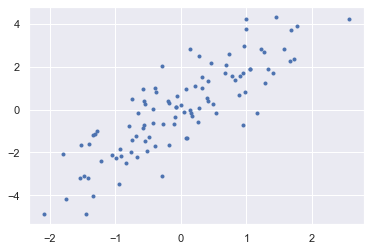

In [38]:
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # for plot styling

plt.scatter(X[:, 0], X[:, 1], marker='.');

In [39]:
indices = np.random.choice(X.shape[0], 20, replace=False)
indices

array([53, 41, 70, 46, 24,  7, 61, 95, 81, 99, 68, 75, 78, 42, 25, 34, 67,
       10, 11, 82])

이제 이 indices를 사용하여 원 자료 X에서 해당 point들을 찾아내려고 합니다. 

In [40]:
selection = X[indices]  # fancy indexing here
selection.shape

(20, 2)

이와 같이 무작위로 선택한 point들 위에 좀 더 큰 원으로 그려 표시할 수 있습니다. 

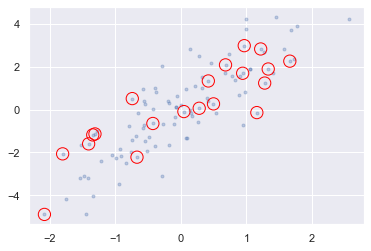

In [46]:
plt.scatter(X[:, 0], X[:, 1], alpha=0.3, marker = '.')
plt.scatter(selection[:, 0], selection[:, 1], color ='red', facecolor='None', s=150);

# Exercises

## 배열에 대한 연산

다음과 같이 주어진 배열 `x`가 있을 때 다음을 구하는 연산을 하십시오. 적절할 때, 배열 인덱싱, 다른 말로, 팬시 인덱싱을 사용하면 좋습니다. 

1. 이 배열에서 3의 배수를 찾아 출력하십시오
1. 이 배열에서 4로 나누면 1이 남는 수를 찾으십시오. 
1. 이 배열에서 3으로 나누면 나누어지고 4로 나누면 1이 남는 수를 찾으십시오.

__Sample Run:__
```
x = np.arange(1, 21)
print(x)
```

__Expected Output:__
```
[ 3  6  9 12 15 18]
[ 1  5  9 13 17]
[9]
```

__Solution:__

In [ ]:
import numpy as np
x = np.arange(1, 21)
print(x)

# your code here

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]


## 벡터화 연산 

다음과 같이, a, b, c가 주어졌을 때, a의 원소가 짝수이고, c의 원소는 50보다 큰 원소 True로 설정하고, 아니면 모두 False설정한 넘파이 배열을 구하십시오. 

__Sample Run:__
```
a = np.array([1, 2, 3, 4, 5])
b = np.array([10, 20, 30, 40, 50])
c = a + b * 2
print(c > 50)
```

__Expected Output:__
```
[ 21  42  63  84 105]
[False False  True  True  True]
[False False False  True False]
```

In [4]:
a = np.array([1, 2, 3, 4, 5])
b = np.array([10, 20, 30, 40, 50])
c = a + b * 2
print(c)
print(c > 50)
print( None ) 

[ 21  42  63  84 105]
[False False  True  True  True]
[False False False  True False]


## Fancy Indexing

주어진 행렬로부터 다음 두 개의 배열을 각각 추출하십시오. 

__Sample Run:__
```
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
```
__Expected Output:__
```
[10,  8,  9]

[[ 6,  4, 5],
 [10,  8,  9]]
```

In [7]:
a = np.arange(12).reshape(3, 4)
print(a)

print(None)
print(None)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[10  8  9]
[[ 6  4  5]
 [10  8  9]]


## Fancy Indexing으로 행과 열을 추출하기

다음 그림과 같이 2차원 배열(행렬)에서 각 행과 열에서 6개의 원소를 Fancy Indexing으로 추출하십시오. 

<center><img src="https://github.com/idebtor/KMOOC-ML/blob/master/ipynb/images/ch2/numpy-fancyindex2.png?raw=true" width="600">
<center>그림 3: 다차원 배열의 행과 열에서 Fancy Indexing 하기 </center>

__Expected Output:__
```
[[ 0  2]
 [ 6  8]
 [12 14]]
```

__Solution:__ 

In [16]:
a = np.arange(15).reshape(5, 3)
print(a)
print(None)

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]
 [12 13 14]]
[[ 0  2]
 [ 6  8]
 [12 14]]


__Alternative:__  Using `step` in `start : end : step` of slicing 

In [26]:
a = np.arange(15).reshape(5, 3)
print(a)
print(None)

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]
 [12 13 14]]
[[ 0  2]
 [ 6  8]
 [12 14]]


## Fancy Indexing으로 정렬하기

다음 배열은 학생 4 명의 과목 성적을 학번 순으로 기록한 것입니다.  첫번째 열(col)은 학번, 두번째 열은 국어 성적, 세번째 열은 수학 성적, 등등 입니다. 각 행(row)를 국어 성적으로 재정렬 할 수 있는 인덱스를 구하고, 그 인덱스를 이용하여 grade 배열을 재정렬하여 출력하십시오.

```
grade = np.array([[ 2011, 91,  89,  71, 98],
                  [ 2122, 82, 100,  92, 99],
                  [ 2230, 93,  83, 100, 80],
                  [ 2240, 77,  99,  80, 90]])
```

__Expected Output:__
```
[[2230   93   83  100   80]
 [2011   91   89   71   98]
 [2240   77   99   80   90]
 [2122   82  100   92   99]]
 ```

__참고__: 우리가 아직 `argsort()`를 배우지 않았으므로, sort index를 수동적으로 구해서 입력해도 좋습니다. 다음 세션에서 `argsort()`를 사용하면, sort index를 구할 수 있습니다.  

__Solution:__

In [59]:
grade = np.array([[ 2011, 91,  89,  71, 98],
                  [ 2122, 82, 100,  92, 99],
                  [ 2230, 93,  83, 100, 80],
                  [ 2240, 77,  99,  80, 90]])
print(grade)
# your code here

[[2011   91   89   71   98]
 [2122   82  100   92   99]
 [2230   93   83  100   80]
 [2240   77   99   80   90]]
[2 0 3 1]
[[2230   93   83  100   80]
 [2011   91   89   71   98]
 [2240   77   99   80   90]
 [2122   82  100   92   99]]


# 학습 정리

넘파이 배열이 왜 필요한지, 연산 속도가 얼마나 빠른지, 넘파의 배열의 기본적인 특성을 살펴보았습니다. 

1. 넘파이 배열
1. 배열의 연산 속도
1. 벡터화 연산 (Vectorization)
1. 배열의 속성  
1. 배열의 인덱싱 (표준, 팬시)

# 참고자료
- CS231n Convolutional Neural Networks for Visual Recognition, [Python Numpy Tutorial](http://cs231n.github.io/python-numpy-tutorial/), Stanford University
- [Python For Data Science Cheat Sheet NumPy Basics](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Numpy_Python_Cheat_Sheet.pdf), DataCamp
- [astroML](http://www.astroml.org/book_figures/appendix/fig_broadcast_visual.html) 
- Python Numpy Tutorial - http://cs231n.github.io/
- 김태완 블로그: [파이썬 데이터 사이언스 Cheat Sheet](http://taewan.kim/post/numpy_cheat_sheet/)